# Assessment

Click to open in:  \[[GitHub](https://github.com/DIDSR/wsi_processing_toolbox/05_performance_assessment.ipynb)\]

Developer: Seyed.kahaki@fda.hhs.gov

## About this notebook
This jupyter notebook can be run on any computer with a standard browser and no prior installation of any programming language is required.

### About

This demonstration guides you through the process of using WSIToolbox to for performance evaluation of ML models. This is enabled using the get_report method of the UncertaintyAnalysis class in the WSIToolbox. The input to this method are the probability results of the ML model as well as the truth values.


1. At the first you should import some packages that you need .

In [1]:
import numpy as np
import pandas as pd
from assessment.uncertainty import Uncertainty_Analysis
UncertaintyAnalysis = Uncertainty_Analysis()

please enter xls file path, for example ./data/ResultsExample.xlsx: 
Do you want to perform Bootsrap? (1 = Yes ,  0 = No)
Do you want to get AUC based on Delong method, for example 100:
Do you want to plot ROC curve (1 = Yes ,  0 = No)
Do you want to get AUC based on Delong method? (1 = Yes ,  0 = No)
1
Please enter a name for this results: 
####################
Results for Test
          pred:yes  pred:no
true:yes       285       14
true:no         79       32
Precision:  0.782967032967033
Precision_CI:  (0.7406191220140836, 0.8253149439199823)
Recall:  0.9531772575250836
Recall_CI:  (0.9292315454409011, 0.9771229696092661)
Delong Method
AUC: 0.8234354756093887
AUC COV: 0.0005619434162873773
95% AUC CI: [0.77697385 0.8698971 ]
Original ROC area: 0.823
Bootstrap #1 ROC area: 0.763
Bootstrap #2 ROC area: 0.816
Bootstrap #3 ROC area: 0.790
Bootstrap #4 ROC area: 0.829
Bootstrap #5 ROC area: 0.855
Bootstrap #6 ROC area: 0.785
Bootstrap #7 ROC area: 0.825
Bootstrap #8 ROC area: 0.832
Boots

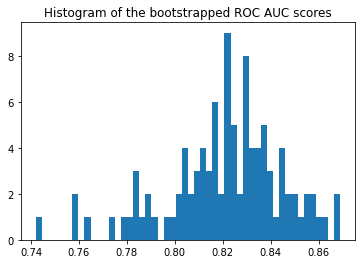

Bootstrap
Confidence interval for the score: [0.778 - 0.857]


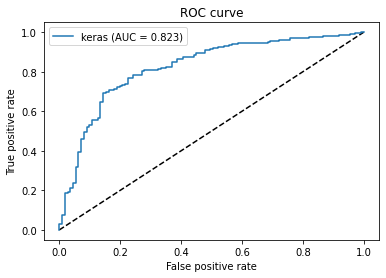

In [3]:
xls_file =input("please enter xls file path, for example ./data/ResultsExample.xlsx: ") or "./data/ResultsExample.xlsx"

perform_Bootstrap = int(input(r"Do you want to perform Bootsrap? (1 = Yes ,  0 = No)") or "1") 
if perform_Bootstrap==1 :
    UncertaintyAnalysis.perform_Bootstrap= True
elif perform_Bootstrap==0 :
    UncertaintyAnalysis.perform_Bootstrap= False
else:
    print('Input sets incorrectly!')
    
if perform_Bootstrap==1 :
    n_bootstraps = int(input(r"Do you want to get AUC based on Delong method, for example 100:") or "100")
    UncertaintyAnalysis.n_bootstraps= n_bootstraps

plot_roc = int(input(r"Do you want to plot ROC curve (1 = Yes ,  0 = No)") or "1")
if plot_roc==1 :
    UncertaintyAnalysis.plot_roc= True
elif plot_roc==0 :
    UncertaintyAnalysis.plot_roc= False
else:
    print('Input sets incorrectly!')
    
    
perform_Delong = int(input(r"Do you want to get AUC based on Delong method? (1 = Yes ,  0 = No)") or "1")
print(perform_Delong)
if perform_Delong==1 :
    UncertaintyAnalysis.perform_Delong= True
elif perform_Delong==0 :
    UncertaintyAnalysis.perform_Delong= False
else:
    print('Input sets incorrectly!')
    

UncertaintyAnalysis.tag = str(input(r"Please enter a name for this results: ") or "Test")
#loading file tnto dataframe
df = pd.read_excel(xls_file)
# print("\n ",df)

#define two list to save values
y_pred=[]
y_truth= []

#extraction columns values 
for i in df.values:
    y_truth.append(i[0])
    y_pred.append(i[1])


#convert list to ndarray
y_pred = np.array(y_pred)
y_truth = np.array(y_truth)

Results = UncertaintyAnalysis.get_report(y_pred , y_truth)

### Setting parameters manually

In [ ]:
UncertaintyAnalysis.perform_Delong = True
UncertaintyAnalysis.perform_Bootstrap = True
UncertaintyAnalysis.plot_roc = True
UncertaintyAnalysis.n_bootstraps = 100
UncertaintyAnalysis.tag = 'My Results'

In [ ]:
#For quick testing
y_pred = np.array([0.21, 0.32, 0.63, 0.35, 0.92, 0.79, 0.82, 0.99, 0.04])
y_truth= np.array([0,    1,    0,    0,    1,    1,    0,    1,   0  ])


Results = UncertaintyAnalysis.get_report(y_pred , y_truth)


In [ ]:
#precision,Precision_CI,recall,Recall_CI, auc_delong ,auc_delong_cov ,ci_delong , fpr_keras, tpr_keras ,auc_keras ,cmtx = Results